In [1]:
!curl -L -o student-course-completion-prediction-dataset.zip https://www.kaggle.com/api/v1/datasets/download/nisargpatel344/student-course-completion-prediction-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4475k  100 4475k    0     0  15.5M      0 --:--:-- --:--:-- --:--:-- 15.5M


In [2]:
from zipfile import ZipFile

with ZipFile("student-course-completion-prediction-dataset.zip","r") as f:
    f.extractall()

In [3]:
ls

Course_Completion_Prediction.csv
sample_data/
student-course-completion-prediction-dataset.zip


In [4]:
import pandas as pd
df = pd.read_csv("Course_Completion_Prediction.csv")

In [5]:
df.head(5)

,Student_ID,Name,Gender,Age,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,...,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed
0,STU100000,Vihaan Patel,Male,19,Diploma,Student,Indore,Laptop,Medium,C102,...,01-06-2024,Scholarship,No,No,1740,49,3,4,3.5,Completed
1,STU100001,Arjun Nair,Female,17,Bachelor,Student,Delhi,Laptop,Low,C106,...,27-04-2025,Credit Card,Yes,No,6147,86,0,0,4.5,Not Completed
2,STU100002,Aditya Bhardwaj,Female,34,Master,Student,Chennai,Mobile,Medium,C101,...,20-01-2024,NetBanking,Yes,No,4280,85,1,0,5.0,Completed
3,STU100003,Krishna Singh,Female,29,Diploma,Employed,Surat,Mobile,High,C105,...,13-05-2025,UPI,Yes,No,3812,42,2,3,3.8,Completed
4,STU100004,Krishna Nair,Female,19,Master,Self-Employed,Lucknow,Laptop,Medium,C106,...,19-12-2024,Debit Card,Yes,Yes,5486,91,3,0,4.0,Completed


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Student_ID                    100000 non-null  object 
 1   Name                          100000 non-null  object 
 2   Gender                        100000 non-null  object 
 3   Age                           100000 non-null  int64  
 4   Education_Level               100000 non-null  object 
 5   Employment_Status             100000 non-null  object 
 6   City                          100000 non-null  object 
 7   Device_Type                   100000 non-null  object 
 8   Internet_Connection_Quality   100000 non-null  object 
 9   Course_ID                     100000 non-null  object 
 10  Course_Name                   100000 non-null  object 
 11  Category                      100000 non-null  object 
 12  Course_Level                  100000 non-null

In [8]:
df.isna().sum()

,0
Student_ID,0
Name,0
Gender,0
Age,0
Education_Level,0
Employment_Status,0
City,0
Device_Type,0
Internet_Connection_Quality,0
Course_ID,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Completed'] = encoder.fit_transform(df['Completed'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Student_ID                    100000 non-null  object 
 1   Name                          100000 non-null  object 
 2   Gender                        100000 non-null  object 
 3   Age                           100000 non-null  int64  
 4   Education_Level               100000 non-null  object 
 5   Employment_Status             100000 non-null  object 
 6   City                          100000 non-null  object 
 7   Device_Type                   100000 non-null  object 
 8   Internet_Connection_Quality   100000 non-null  object 
 9   Course_ID                     100000 non-null  object 
 10  Course_Name                   100000 non-null  object 
 11  Category                      100000 non-null  object 
 12  Course_Level                  100000 non-null

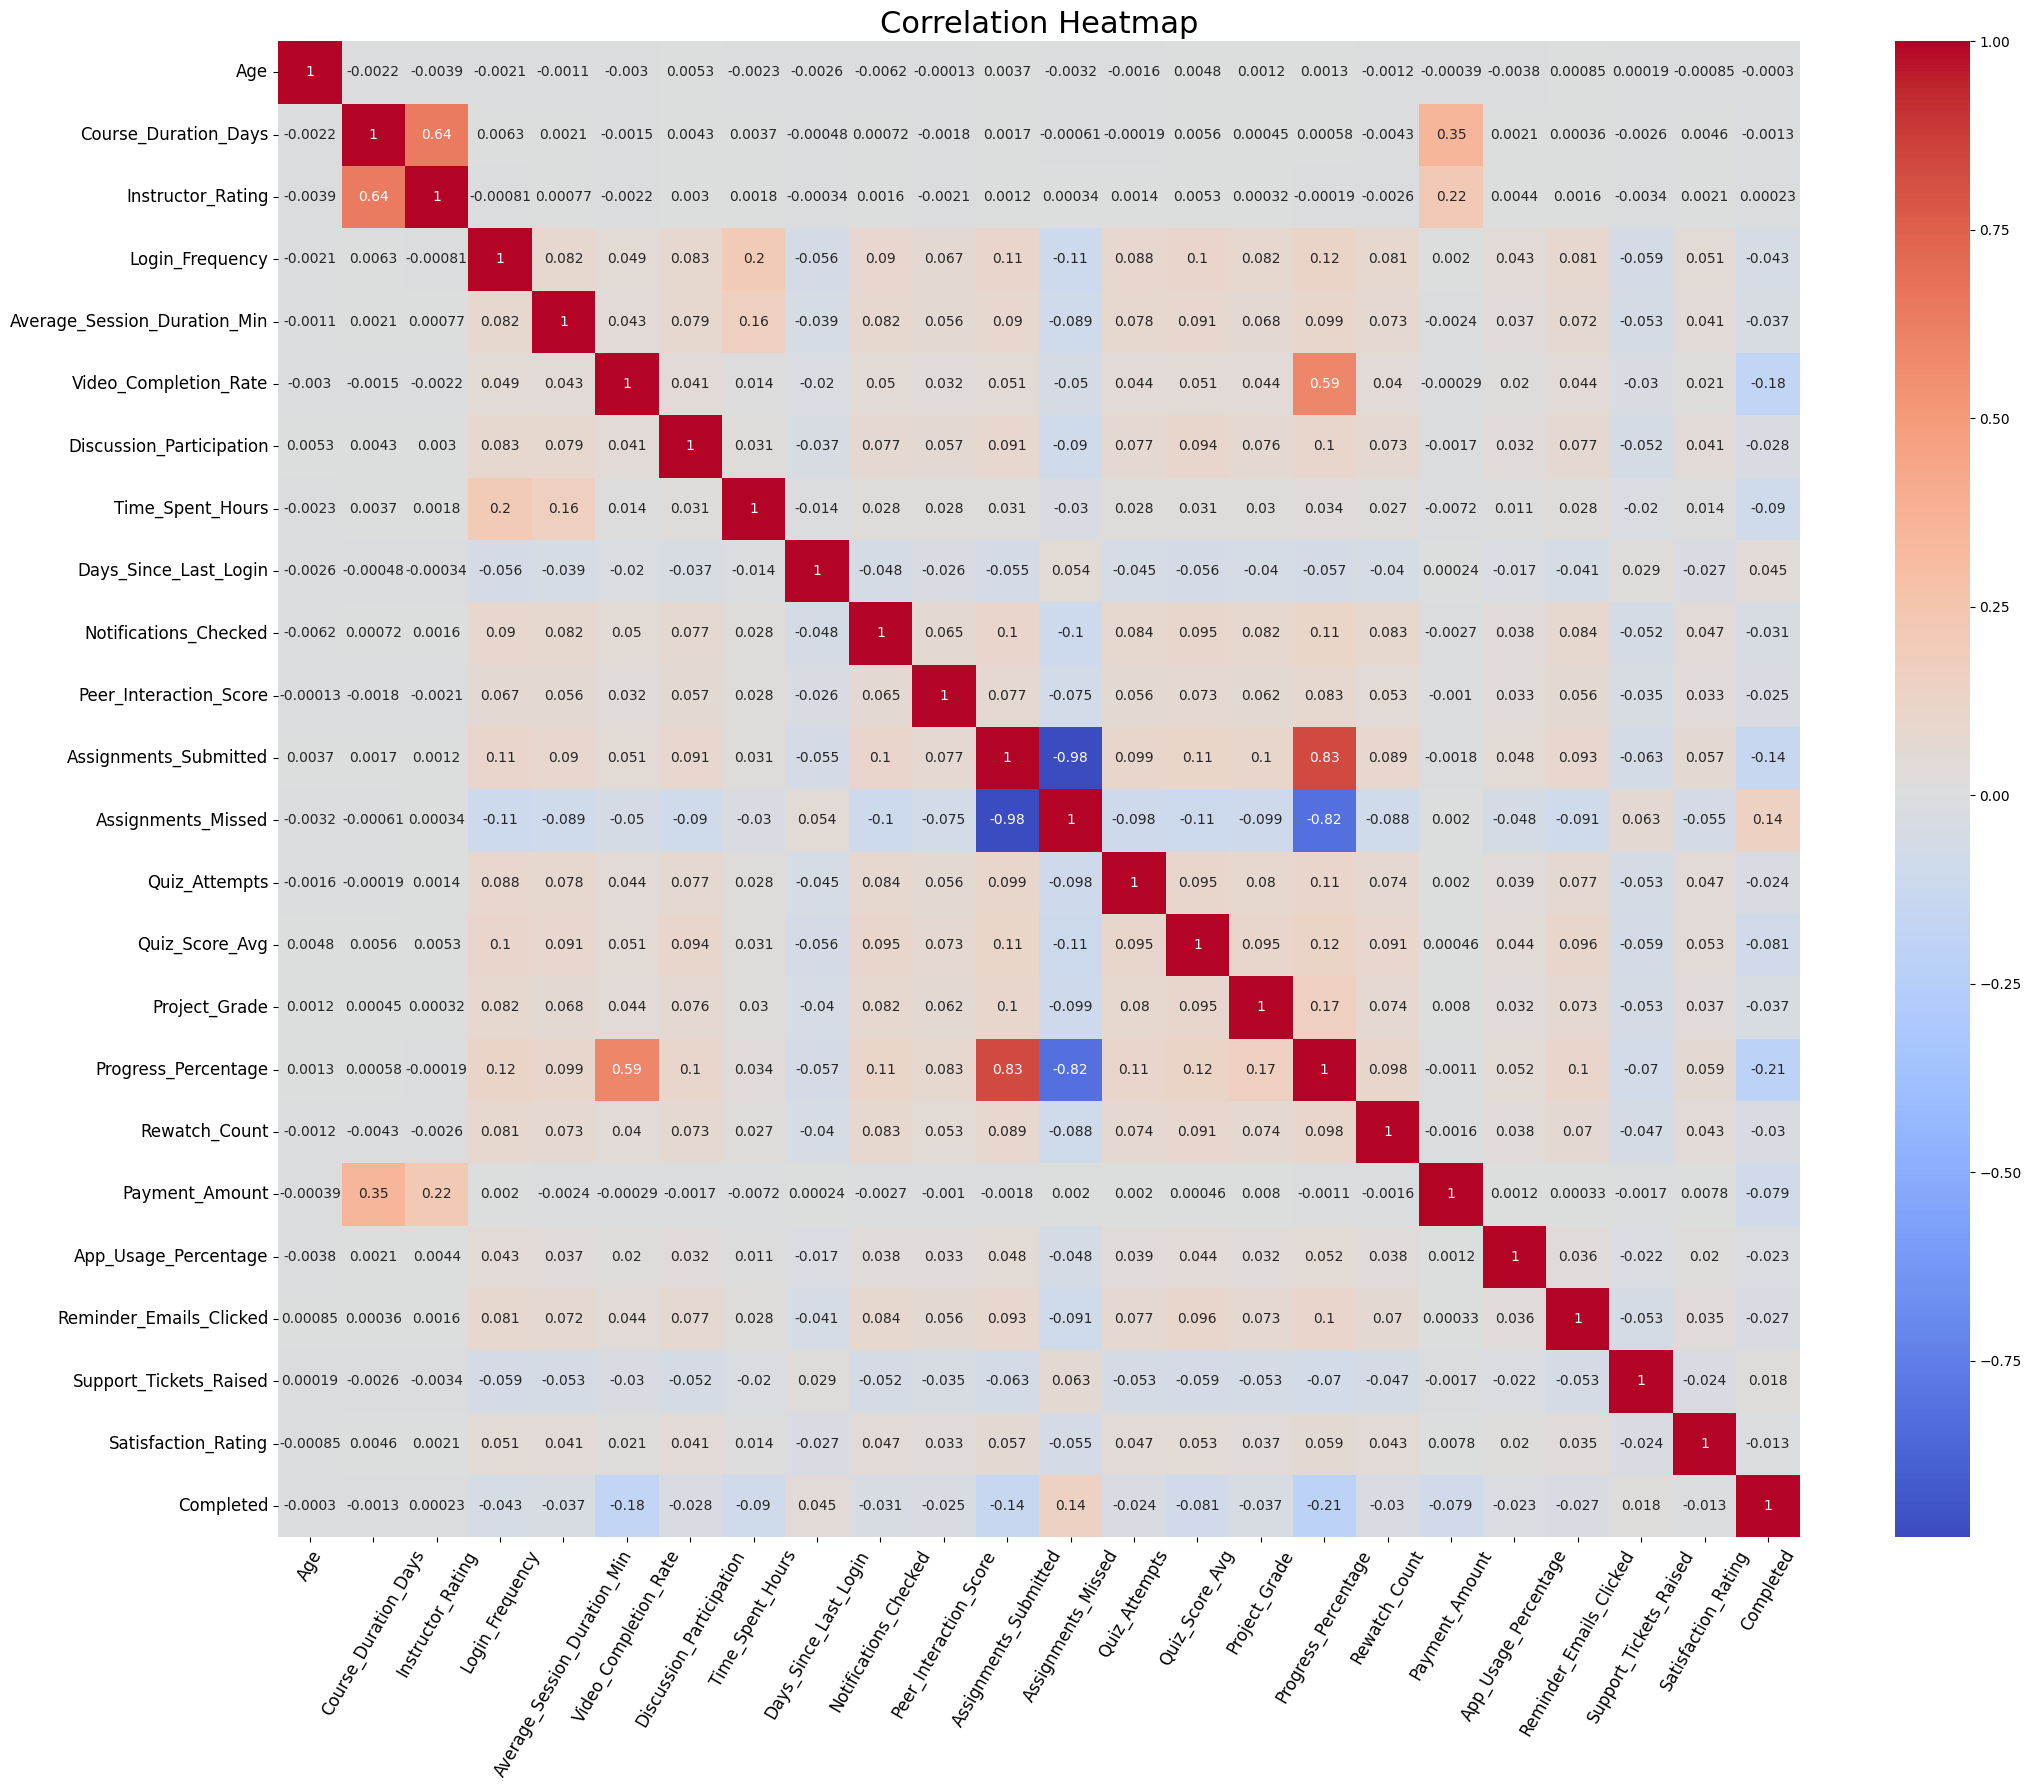

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 18))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm',
            annot_kws={"size": 10})
plt.title("Correlation Heatmap", fontsize=22)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()



In [15]:
X = df.drop(['Progress_Percentage','Assignments_Submitted','Completed','Student_ID','Name','Gender'],axis=1)
y = df['Completed'].copy()

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
import numpy as np

num_features = X_train.select_dtypes(include=[np.number]).columns
cat_features = X_train.select_dtypes(exclude=[np.number]).columns

In [20]:
num_features

Index(['Age', 'Course_Duration_Days', 'Instructor_Rating', 'Login_Frequency',
       'Average_Session_Duration_Min', 'Video_Completion_Rate',
       'Discussion_Participation', 'Time_Spent_Hours', 'Days_Since_Last_Login',
       'Notifications_Checked', 'Peer_Interaction_Score', 'Assignments_Missed',
       'Quiz_Attempts', 'Quiz_Score_Avg', 'Project_Grade', 'Rewatch_Count',
       'Payment_Amount', 'App_Usage_Percentage', 'Reminder_Emails_Clicked',
       'Support_Tickets_Raised', 'Satisfaction_Rating'],
      dtype='object')

In [21]:
cat_features

Index(['Education_Level', 'Employment_Status', 'City', 'Device_Type',
       'Internet_Connection_Quality', 'Course_ID', 'Course_Name', 'Category',
       'Course_Level', 'Enrollment_Date', 'Payment_Mode', 'Fee_Paid',
       'Discount_Used'],
      dtype='object')

In [22]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [36]:
num_pipeline = Pipeline ([
    ('impute',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

cat_pipeline = Pipeline ([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num',num_pipeline,num_features),
    ('cat',cat_pipeline,cat_features)
])

estimator = RandomForestClassifier()

pipeline = Pipeline ([
    ('transformer', transformer),
    ('estimator',estimator)
])

In [37]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Course_Duration_Days', 'Instructor_Rating', 'Login_Frequency',
       'Average_Session_Duration_Min', 'Video_Completion_Rate',
       'Discussion_Participation', 'Time_Spent_Hours', 'Days_Since_Last_Login',
       'Notific...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Education_Level', 'Employment_Status', 'City', 'Device_Type',
       'Internet_Connection_Quality', 'Course_ID', 'Course_Name', 'Category',
       'Course_Level', 'Enrollment_Date', 'Payment_Mode', 'Fee_Paid',
       'Discount_Used'],
      dtype='object'))])),
                ('estimator', RandomForestClassifier())])

In [42]:
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix, ConfusionMatrixDisplay

In [39]:
y_pred_lr = pipeline.predict(X_test)

In [40]:
print('==== Model Scores ====')
print('Train Score: ',pipeline.score(X_train,y_train))
print('Test Score: ',pipeline.score(X_test,y_test))
print('Precision Score:',precision_score(y_test,y_pred_lr))
print('Recall Score:',recall_score(y_test,y_pred_lr))
print('F1 Score:',f1_score(y_test,y_pred_lr))

==== Model Scores ====
Train Score:  1.0
Test Score:  0.5894
Precision Score: 0.5958478851377571
Recall Score: 0.6028661170003926
F1 Score: 0.599336455893833


LOGISTIC REGRESSION  
==== Model Scores ====  
Train Score:  0.6136125  
Test Score:  0.60435  
Precision Score: 0.6085918854415274  
Recall Score: 0.625736160188457  
F1 Score: 0.6170449595896046  

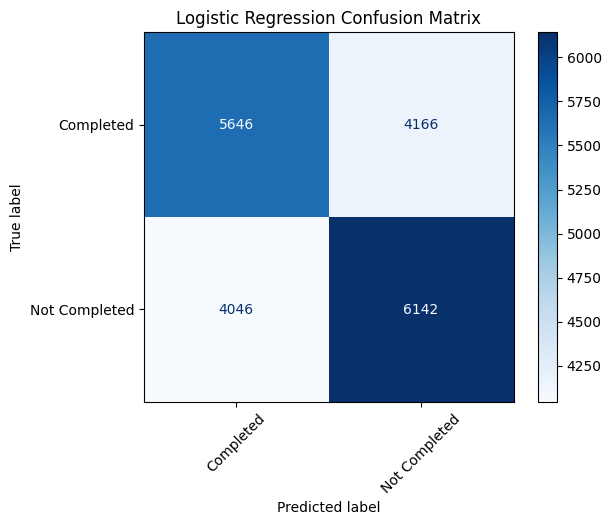

In [44]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=encoder.classes_)
disp_lr.plot(cmap='Blues', xticks_rotation=45)
plt.title("Logistic Regression Confusion Matrix")
plt.show()